In [39]:
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_path = "./all_results.csv"

In [3]:
df = pd.read_csv(csv_path)
df['testsuite_reduction'] = pd.to_numeric(df['testsuite_reduction'], errors='coerce')
df['percent_mutatants_killed'] = pd.to_numeric(df['percent_mutatants_killed'], errors='coerce')
df = df.drop(['Unnamed: 20', 'Unnamed: 25', 'rev1', ' All1', ' STARTS1', ' Ekstazi1', 'rev2', ' All2', ' STARTS2', ' Ekstazi2'], axis=1)
df = df[df['changed_classes'] != 0]
# df = df[df['changed_classes'] > 2]
df = df[df['rev'] != 'rev_1']
df

,subject,rev,tool,time_full_suite,end-to-end,endtoend_reduction,total_tests,selected_test_classes,percent_classes_selected,changed_classes,percent_mutatants_killed,main_files,main_loc,test_files,test_loc,total_classes,percent_of_test_classes,all_test_cases,selected_test_cases,testsuite_reduction
6,asterisk,rev_10,STARTS,8.637,8.365,7.668,46,6,13.043478,6.0,6.0,737,51195,58,4962,795,7.295597,252,35,0.861111
7,asterisk,rev_10,Ekstazi,9.027,8.402,8.096,46,4,8.695652,6.0,6.0,737,51195,58,4962,795,7.295597,252,12,0.952381
12,asterisk,rev_11,STARTS,22.600,7.894,22.251,46,2,4.347826,1.0,39.0,737,51210,58,4962,795,7.295597,252,23,0.908730
13,asterisk,rev_11,Ekstazi,22.694,8.695,22.311,46,1,2.173913,1.0,39.0,737,51210,58,4962,795,7.295597,252,22,0.912698
18,validator,rev_12,STARTS,23.441,7.654,23.114,71,1,1.408451,1.0,77.0,64,7549,84,8911,148,56.756757,576,12,0.979167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,asterisk,rev_8,Ekstazi,22.572,8.570,22.192,46,2,4.347826,1.0,71.0,737,51170,58,4959,795,7.295597,252,44,0.825397
288,imaging,rev_9,STARTS,9.209,7.050,8.443,113,59,52.212389,5.0,57.0,343,31294,148,7343,491,30.142566,574,469,0.182927
289,imaging,rev_9,Ekstazi,9.301,8.266,8.412,113,48,42.477876,5.0,58.0,343,31294,148,7343,491,30.142566,574,362,0.369338
290,validator,rev_9,STARTS,22.987,28.253,21.758,71,3,4.225352,1.0,90.0,64,7545,84,8911,148,56.756757,576,40,0.930556


In [4]:
filtered_size_df = df.dropna(subset=['testsuite_reduction'])
filtered_fault_df = df.dropna(subset=['percent_mutatants_killed'])

In [5]:
# len(filtered_size_df[(filtered_size_df['subject'] =='imaging' & filtered_size_df['tool'] =='starts')])
# filtered_size_df[(filtered_size_df['subject'] == 'imaging') 
#                      & (filtered_size_df['tool'] == 'STARTS')]['testsuite_reduction']
# filtered_size_df[(filtered_size_df['subject'] == 'imaging') 
#                      & (filtered_size_df['tool'] == 'Ekstazi')]['testsuite_reduction']

# End to end time reduction

C:\Users\paige\AppData\Local\Temp\ipykernel_41312\1792568936.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tool', y='endtoend_reduction', data=df, palette='Set3')
C:\Users\paige\AppData\Local\Temp\ipykernel_41312\1792568936.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='tool', y='endtoend_reduction', data=df,


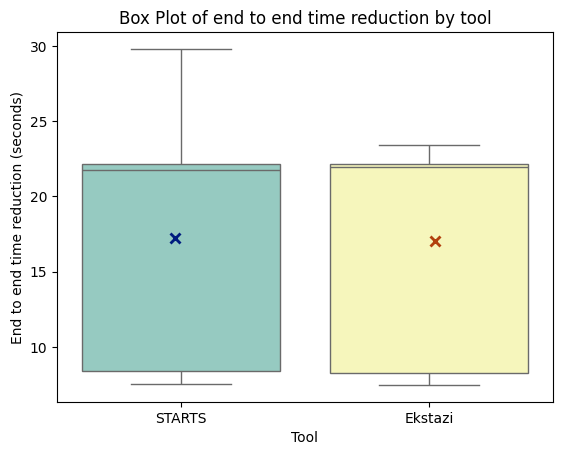

STARTS: mean=17.252 std=6.980
Ekstazi: mean=17.053 std=6.840


In [6]:
sns.boxplot(x='tool', y='endtoend_reduction', data=df, palette='Set3')
plt.title('Box Plot of end to end time reduction by tool')
plt.ylabel('End to end time reduction (seconds)')
plt.xlabel('Tool')
sns.pointplot(x='tool', y='endtoend_reduction', data=df, 
              dodge=True, linestyle='none', markers="x", palette="dark", errorbar=None)
plt.savefig('figures/time_tools.png', dpi=300)
plt.show()
s_time_mean = df[df['tool']=='STARTS']['endtoend_reduction'].mean()
e_time_mean = df[df['tool']=='Ekstazi']['endtoend_reduction'].mean()
s_time_std = df[df['tool']=='STARTS']['endtoend_reduction'].std()
e_time_std = df[df['tool']=='Ekstazi']['endtoend_reduction'].std()
print(f'STARTS: mean={s_time_mean:.3f} std={s_time_std:.3f}')
print(f'Ekstazi: mean={e_time_mean:.3f} std={e_time_std:.3f}')

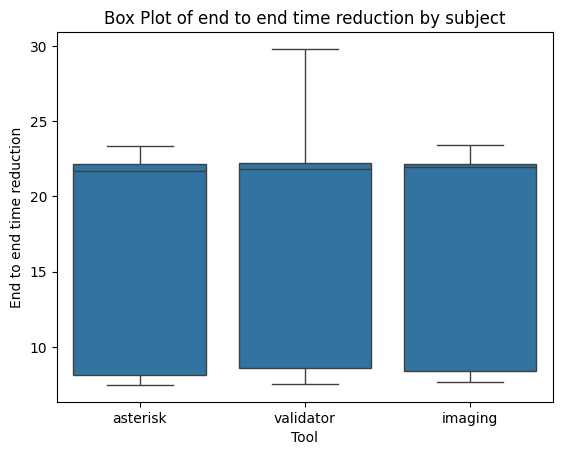

Asterisk: mean=16.411 std=7.015 num samples=44
Imaging: mean=17.013 std=6.872 num samples=38
Validator: mean=18.268 std=6.774 num samples=34


In [7]:
sns.boxplot(x='subject', y='endtoend_reduction', data=df)
plt.title('Box Plot of end to end time reduction by subject')
plt.ylabel('End to end time reduction')
plt.xlabel('Tool')
plt.show()
a_time_mean = df[df['subject']=='asterisk']['endtoend_reduction'].mean()
i_time_mean = df[df['subject']=='imaging']['endtoend_reduction'].mean()
v_time_mean = df[df['subject']=='validator']['endtoend_reduction'].mean()
a_time_std = df[df['subject']=='asterisk']['endtoend_reduction'].std()
i_time_std = df[df['subject']=='imaging']['endtoend_reduction'].std()
v_time_std = df[df['subject']=='validator']['endtoend_reduction'].std()
a_len = len(df[df['subject']=='asterisk'])
i_len = len(df[df['subject']=='imaging'])
v_len = len(df[df['subject']=='validator'])
print(f'Asterisk: mean={a_time_mean:.3f} std={a_time_std:.3f} num samples={a_len}')
print(f'Imaging: mean={i_time_mean:.3f} std={i_time_std:.3f} num samples={i_len}')
print(f'Validator: mean={v_time_mean:.3f} std={v_time_std:.3f} num samples={v_len}')

C:\Users\paige\AppData\Local\Temp\ipykernel_41312\3571450370.py:4: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='subject', y='endtoend_reduction', hue='tool', data=filtered_fault_df,


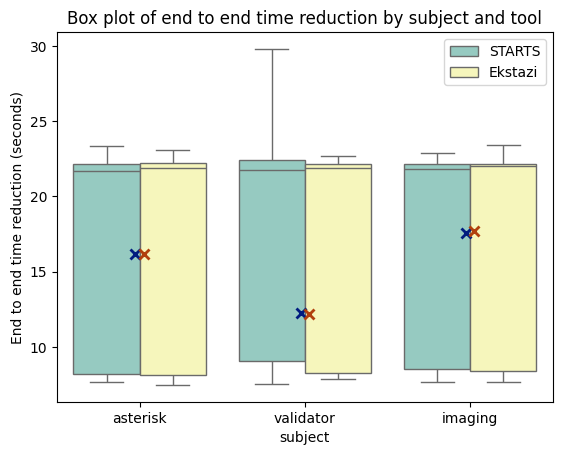

In [8]:
sns.boxplot(x='subject', y='endtoend_reduction', hue='tool', data=df, palette='Set3')
plt.ylabel('End to end time reduction (seconds)')
plt.title('Box plot of end to end time reduction by subject and tool')
sns.pointplot(x='subject', y='endtoend_reduction', hue='tool', data=filtered_fault_df, 
              dodge=True, join=False, markers="x", palette="dark", errorbar=None)
handles, labels = plt.gca().get_legend_handles_labels()
new_handles = handles[:2]  # Adjust the index depending on which items you want to keep
new_labels = labels[:2]
plt.legend(new_handles, new_labels)
plt.savefig('figures/time_tools_subjects.png', dpi=300)
plt.show()

In [9]:
a_s_time_mean = df[(df['subject']=='asterisk')&(df['tool']=='STARTS')]['endtoend_reduction'].mean()
i_s_time_mean = df[(df['subject']=='imaging')&(df['tool']=='STARTS')]['endtoend_reduction'].mean()
v_s_time_mean = df[(df['subject']=='validator')&(df['tool']=='STARTS')]['endtoend_reduction'].mean()
a_s_time_std = df[(df['subject']=='asterisk')&(df['tool']=='STARTS')]['endtoend_reduction'].std()
i_s_time_std = df[(df['subject']=='imaging')&(df['tool']=='STARTS')]['endtoend_reduction'].std()
v_s_time_std = df[(df['subject']=='validator')&(df['tool']=='STARTS')]['endtoend_reduction'].std()
a_e_time_mean = df[(df['subject']=='asterisk')&(df['tool']=='Ekstazi')]['endtoend_reduction'].mean()
i_e_time_mean = df[(df['subject']=='imaging')&(df['tool']=='Ekstazi')]['endtoend_reduction'].mean()
v_e_time_mean = df[(df['subject']=='validator')&(df['tool']=='Ekstazi')]['endtoend_reduction'].mean()
a_e_time_std = df[(df['subject']=='asterisk')&(df['tool']=='Ekstazi')]['endtoend_reduction'].std()
i_e_time_std = df[(df['subject']=='imaging')&(df['tool']=='Ekstazi')]['endtoend_reduction'].std()
v_e_time_std = df[(df['subject']=='validator')&(df['tool']=='Ekstazi')]['endtoend_reduction'].std()
print(f'Asterisk+STARTS: mean={a_s_time_mean:.3f} std={a_s_time_std:.3f}')
print(f'Imaging+STARTS: mean={i_s_time_mean:.3f} std={i_s_time_std:.3f}')
print(f'Validator+STARTS: mean={v_s_time_mean:.3f} std={v_s_time_std:.3f}')
print(f'Asterisk+Ekstazi: mean={a_e_time_mean:.3f} std={a_e_time_std:.3f}')
print(f'Imaging+Ekstazi: mean={i_e_time_mean:.3f} std={i_e_time_std:.3f}')
print(f'Validator+Ekstazi: mean={v_e_time_mean:.3f} std={v_e_time_std:.3f}')

Asterisk+STARTS: mean=16.441 std=7.025
Imaging+STARTS: mean=16.970 std=6.945
Validator+STARTS: mean=18.619 std=7.181
Asterisk+Ekstazi: mean=16.381 std=7.171
Imaging+Ekstazi: mean=17.056 std=6.987
Validator+Ekstazi: mean=17.918 std=6.544


# Test suite size reduction

C:\Users\paige\AppData\Local\Temp\ipykernel_41312\725787161.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tool', y='testsuite_reduction', data=filtered_size_df, palette='Set3')
C:\Users\paige\AppData\Local\Temp\ipykernel_41312\725787161.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='tool', y='testsuite_reduction', data=filtered_size_df,


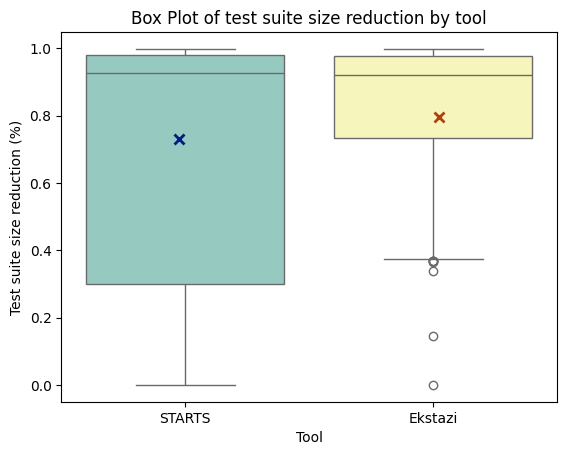

STARTS: mean=0.730 std=0.348
Ekstazi: mean=0.795 std=0.258
number of samples: 109


In [10]:
sns.boxplot(x='tool', y='testsuite_reduction', data=filtered_size_df, palette='Set3')
plt.title('Box Plot of test suite size reduction by tool')
plt.ylabel('Test suite size reduction (%)')
plt.xlabel('Tool')
sns.pointplot(x='tool', y='testsuite_reduction', data=filtered_size_df, 
              dodge=True, linestyle='none', markers="x", palette="dark", errorbar=None)
plt.savefig('figures/size_tools.png', dpi=300)
plt.show()
s_size_mean = filtered_size_df[filtered_size_df['tool']=='STARTS']['testsuite_reduction'].mean()
e_size_mean = filtered_size_df[filtered_size_df['tool']=='Ekstazi']['testsuite_reduction'].mean()
s_size_std = filtered_size_df[filtered_size_df['tool']=='STARTS']['testsuite_reduction'].std()
e_size_std = filtered_size_df[filtered_size_df['tool']=='Ekstazi']['testsuite_reduction'].std()
print(f'STARTS: mean={s_size_mean:.3f} std={s_size_std:.3f}')
print(f'Ekstazi: mean={e_size_mean:.3f} std={e_size_std:.3f}')
print(f'number of samples: {len(filtered_size_df)}')

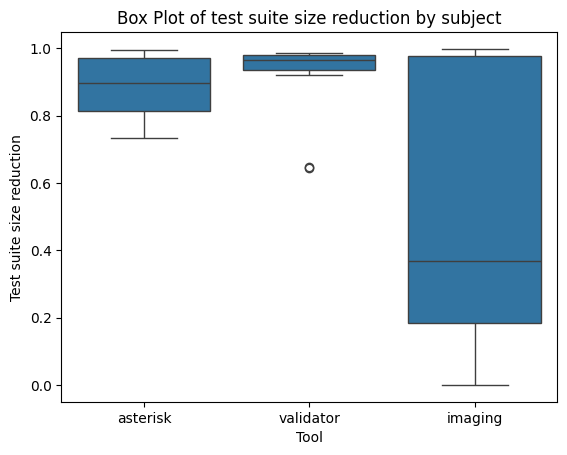

Asterisk: mean=0.891 std=0.083 num samples= 37
Imaging: mean=0.472 std=0.367 num samples= 38
Validator: mean=0.942 std=0.078 num samples= 34


In [11]:
sns.boxplot(x='subject', y='testsuite_reduction', data=filtered_size_df)
plt.title('Box Plot of test suite size reduction by subject')
plt.ylabel('Test suite size reduction')
plt.xlabel('Tool')
plt.show()
a_size_mean = filtered_size_df[filtered_size_df['subject']=='asterisk']['testsuite_reduction'].mean()
i_size_mean = filtered_size_df[filtered_size_df['subject']=='imaging']['testsuite_reduction'].mean()
v_size_mean = filtered_size_df[filtered_size_df['subject']=='validator']['testsuite_reduction'].mean()
a_size_std = filtered_size_df[filtered_size_df['subject']=='asterisk']['testsuite_reduction'].std()
i_size_std = filtered_size_df[filtered_size_df['subject']=='imaging']['testsuite_reduction'].std()
v_size_std = filtered_size_df[filtered_size_df['subject']=='validator']['testsuite_reduction'].std()
a_size_len = len(filtered_size_df[filtered_size_df['subject']=='asterisk'])
i_size_len = len(filtered_size_df[filtered_size_df['subject']=='imaging'])
v_size_len = len(filtered_size_df[filtered_size_df['subject']=='validator'])
print(f'Asterisk: mean={a_size_mean:.3f} std={a_size_std:.3f} num samples= {a_size_len}')
print(f'Imaging: mean={i_size_mean:.3f} std={i_size_std:.3f} num samples= {i_size_len}')
print(f'Validator: mean={v_size_mean:.3f} std={v_size_std:.3f} num samples= {v_size_len}')

In [12]:
temp=filtered_size_df[(filtered_size_df['subject']=='imaging')&(filtered_size_df['tool']=='STARTS')
                     &(filtered_size_df['testsuite_reduction'] < .2)
                     &(filtered_size_df['testsuite_reduction'] > 0)]
temp['testsuite_reduction'].mean()
filtered_size_df[(filtered_size_df['subject']=='imaging')&(filtered_size_df['tool']=='STARTS')
                &(filtered_size_df['testsuite_reduction'] > .2)]['testsuite_reduction'].mean()

0.99436587925

In [13]:
# filtered_size_df[(filtered_size_df['subject']=='imaging')&(filtered_size_df['tool']=='Ekstazi')]

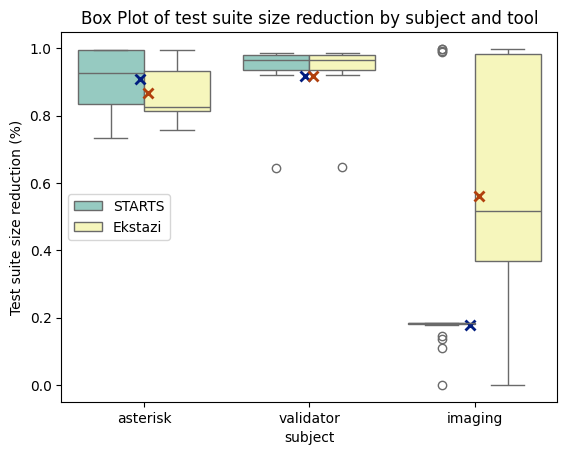

In [14]:
sns.boxplot(x='subject', y='testsuite_reduction', hue='tool', data=filtered_size_df, palette="Set3")
plt.ylabel('Test suite size reduction (%)')
plt.title('Box Plot of test suite size reduction by subject and tool')
sns.pointplot(x='subject', y='testsuite_reduction', hue='tool', data=filtered_fault_df, 
              dodge=True, linestyle='none', markers="x", palette="dark", errorbar=None)
handles, labels = plt.gca().get_legend_handles_labels()
new_handles = handles[:2]  # Adjust the index depending on which items you want to keep
new_labels = labels[:2]
plt.legend(new_handles, new_labels)
plt.savefig('figures/size_tools_subjects.png', dpi=300)
plt.show()

In [15]:
a_s_size_mean = filtered_size_df[(filtered_size_df['subject']=='asterisk')&(filtered_size_df['tool']=='STARTS')]['testsuite_reduction'].mean()
i_s_size_mean = filtered_size_df[(filtered_size_df['subject']=='imaging')&(filtered_size_df['tool']=='STARTS')]['testsuite_reduction'].mean()
v_s_size_mean = filtered_size_df[(filtered_size_df['subject']=='validator')&(filtered_size_df['tool']=='STARTS')]['testsuite_reduction'].mean()
a_s_size_std = filtered_size_df[(filtered_size_df['subject']=='asterisk')&(filtered_size_df['tool']=='STARTS')]['testsuite_reduction'].std()
i_s_size_std = filtered_size_df[(filtered_size_df['subject']=='imaging')&(filtered_size_df['tool']=='STARTS')]['testsuite_reduction'].std()
v_s_size_std = filtered_size_df[(filtered_size_df['subject']=='validator')&(filtered_size_df['tool']=='STARTS')]['testsuite_reduction'].std()
a_e_size_mean = filtered_size_df[(filtered_size_df['subject']=='asterisk')&(filtered_size_df['tool']=='Ekstazi')]['testsuite_reduction'].mean()
i_e_size_mean = filtered_size_df[(filtered_size_df['subject']=='imaging')&(filtered_size_df['tool']=='Ekstazi')]['testsuite_reduction'].mean()
v_e_size_mean = filtered_size_df[(filtered_size_df['subject']=='validator')&(filtered_size_df['tool']=='Ekstazi')]['testsuite_reduction'].mean()
a_e_size_std = filtered_size_df[(filtered_size_df['subject']=='asterisk')&(filtered_size_df['tool']=='Ekstazi')]['testsuite_reduction'].std()
i_e_size_std = filtered_size_df[(filtered_size_df['subject']=='imaging')&(filtered_size_df['tool']=='Ekstazi')]['testsuite_reduction'].std()
v_e_size_std = filtered_size_df[(filtered_size_df['subject']=='validator')&(filtered_size_df['tool']=='Ekstazi')]['testsuite_reduction'].std()
print(f'Asterisk+STARTS: mean={a_s_size_mean:.3f} std={a_s_size_std:.3f}')
print(f'Imaging+STARTS: mean={i_s_size_mean:.3f} std={i_s_size_std:.3f}')
print(f'Validator+STARTS: mean={v_s_size_mean:.3f} std={v_s_size_std:.3f}')
print(f'Asterisk+Ekstazi: mean={a_e_size_mean:.3f} std={a_e_size_std:.3f}')
print(f'Imaging+Ekstazi: mean={i_e_size_mean:.3f} std={i_e_size_std:.3f}')
print(f'Validator+Ekstazi: mean={v_e_size_mean:.3f} std={v_e_size_std:.3f}')

Asterisk+STARTS: mean=0.907 std=0.085
Imaging+STARTS: mean=0.336 std=0.352
Validator+STARTS: mean=0.942 std=0.080
Asterisk+Ekstazi: mean=0.867 std=0.077
Imaging+Ekstazi: mean=0.608 std=0.337
Validator+Ekstazi: mean=0.942 std=0.079


# Fault detection

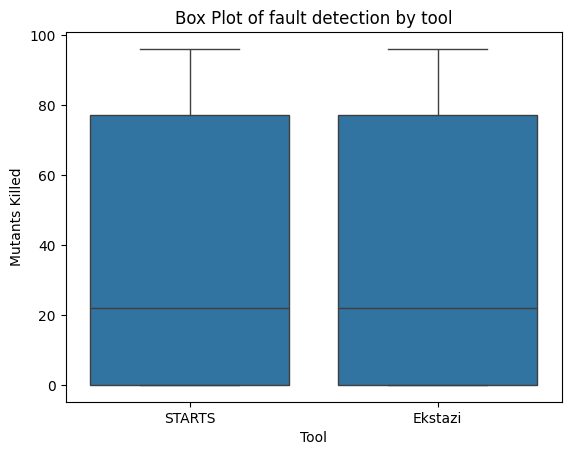

STARTS: mean=35.595 std=35.690
Ekstazi: mean=35.676 std=35.731
total sameples: 74


In [16]:
sns.boxplot(x='tool', y='percent_mutatants_killed', data=filtered_fault_df)
plt.title('Box Plot of fault detection by tool')
plt.ylabel('Mutants Killed')
plt.xlabel('Tool')
plt.show()
s_fault_mean = filtered_fault_df[filtered_fault_df['tool']=='STARTS']['percent_mutatants_killed'].mean()
e_fault_mean = filtered_fault_df[filtered_fault_df['tool']=='Ekstazi']['percent_mutatants_killed'].mean()
s_fault_std = filtered_fault_df[filtered_fault_df['tool']=='STARTS']['percent_mutatants_killed'].std()
e_fault_std = filtered_fault_df[filtered_fault_df['tool']=='Ekstazi']['percent_mutatants_killed'].std()
print(f'STARTS: mean={s_fault_mean:.3f} std={s_fault_std:.3f}')
print(f'Ekstazi: mean={e_fault_mean:.3f} std={e_fault_std:.3f}')
print(f'total sameples: {len(filtered_fault_df)}')

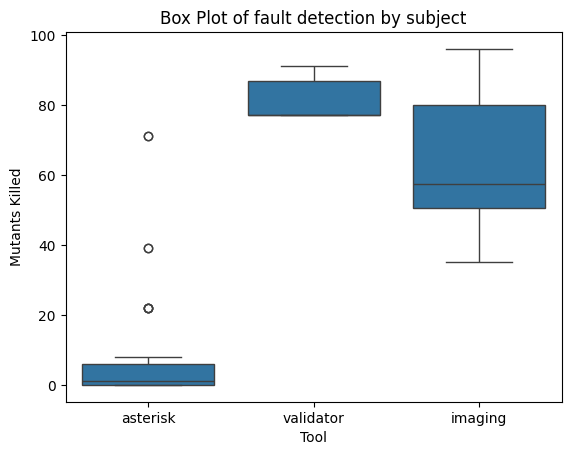

Asterisk: mean=8.667 std=17.274 samples=42
Imaging: mean=63.389 std=18.815 samples=18
Validator: mean=80.857 std=6.335 samples=14


In [17]:
sns.boxplot(x='subject', y='percent_mutatants_killed', data=filtered_fault_df)
plt.title('Box Plot of fault detection by subject')
plt.ylabel('Mutants Killed')
plt.xlabel('Tool')
plt.show()
a_fault_mean = filtered_fault_df[filtered_fault_df['subject']=='asterisk']['percent_mutatants_killed'].mean()
i_fault_mean = filtered_fault_df[filtered_fault_df['subject']=='imaging']['percent_mutatants_killed'].mean()
v_fault_mean = filtered_fault_df[filtered_fault_df['subject']=='validator']['percent_mutatants_killed'].mean()
a_fault_std = filtered_fault_df[filtered_fault_df['subject']=='asterisk']['percent_mutatants_killed'].std()
i_fault_std = filtered_fault_df[filtered_fault_df['subject']=='imaging']['percent_mutatants_killed'].std()
v_fault_std = filtered_fault_df[filtered_fault_df['subject']=='validator']['percent_mutatants_killed'].std()
a_len = len(filtered_fault_df[filtered_fault_df['subject']=='asterisk'])
i_len = len(filtered_fault_df[filtered_fault_df['subject']=='imaging'])
v_len = len(filtered_fault_df[filtered_fault_df['subject']=='validator'])
print(f'Asterisk: mean={a_fault_mean:.3f} std={a_fault_std:.3f} samples={a_len}')
print(f'Imaging: mean={i_fault_mean:.3f} std={i_fault_std:.3f} samples={i_len}')
print(f'Validator: mean={v_fault_mean:.3f} std={v_fault_std:.3f} samples={v_len}')

C:\Users\paige\AppData\Local\Temp\ipykernel_41312\1937280640.py:5: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='subject', y='percent_mutatants_killed', hue='tool', data=filtered_fault_df,


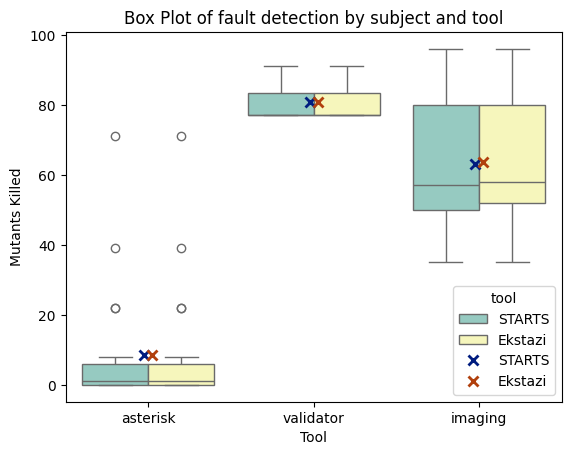

In [18]:
sns.boxplot(x='subject', y='percent_mutatants_killed', hue='tool', data=filtered_fault_df, palette="Set3")
plt.title('Box Plot of fault detection by subject and tool')
plt.ylabel('Mutants Killed')
plt.xlabel('Tool')
sns.pointplot(x='subject', y='percent_mutatants_killed', hue='tool', data=filtered_fault_df, 
              dodge=True, join=False, markers="x", palette="dark", errorbar=None)
plt.show()

In [19]:
a_s_fault_mean = filtered_fault_df[(filtered_fault_df['subject']=='asterisk')&(filtered_fault_df['tool']=='STARTS')]['percent_mutatants_killed'].mean()
i_s_fault_mean = filtered_fault_df[(filtered_fault_df['subject']=='imaging')&(filtered_fault_df['tool']=='STARTS')]['percent_mutatants_killed'].mean()
v_s_fault_mean = filtered_fault_df[(filtered_fault_df['subject']=='validator')&(filtered_fault_df['tool']=='STARTS')]['percent_mutatants_killed'].mean()
a_s_fault_std = filtered_fault_df[(filtered_fault_df['subject']=='asterisk')&(filtered_fault_df['tool']=='STARTS')]['percent_mutatants_killed'].std()
i_s_fault_std = filtered_fault_df[(filtered_fault_df['subject']=='imaging')&(filtered_fault_df['tool']=='STARTS')]['percent_mutatants_killed'].std()
v_s_fault_std = filtered_fault_df[(filtered_fault_df['subject']=='validator')&(filtered_fault_df['tool']=='STARTS')]['percent_mutatants_killed'].std()
a_e_fault_mean = filtered_fault_df[(filtered_fault_df['subject']=='asterisk')&(filtered_fault_df['tool']=='Ekstazi')]['percent_mutatants_killed'].mean()
i_e_fault_mean = filtered_fault_df[(filtered_fault_df['subject']=='imaging')&(filtered_fault_df['tool']=='Ekstazi')]['percent_mutatants_killed'].mean()
v_e_fault_mean = filtered_fault_df[(filtered_fault_df['subject']=='validator')&(filtered_fault_df['tool']=='Ekstazi')]['percent_mutatants_killed'].mean()
a_e_fault_std = filtered_fault_df[(filtered_fault_df['subject']=='asterisk')&(filtered_fault_df['tool']=='Ekstazi')]['percent_mutatants_killed'].std()
i_e_fault_std = filtered_fault_df[(filtered_fault_df['subject']=='imaging')&(filtered_fault_df['tool']=='Ekstazi')]['percent_mutatants_killed'].std()
v_e_fault_std = filtered_fault_df[(filtered_fault_df['subject']=='validator')&(filtered_fault_df['tool']=='Ekstazi')]['percent_mutatants_killed'].std()
print(f'Asterisk+STARTS: mean={a_s_fault_mean:.3f} std={a_s_fault_std:.3f}')
print(f'Imaging+STARTS: mean={i_s_fault_mean:.3f} std={i_s_fault_std:.3f}')
print(f'Validator+STARTS: mean={v_s_fault_mean:.3f} std={v_s_fault_std:.3f}')
print(f'Asterisk+Ekstazi: mean={a_e_fault_mean:.3f} std={a_e_fault_std:.3f}')
print(f'Imaging+Ekstazi: mean={i_e_fault_mean:.3f} std={i_e_fault_std:.3f}')
print(f'Validator+Ekstazi: mean={v_e_fault_mean:.3f} std={v_e_fault_std:.3f}')

Asterisk+STARTS: mean=8.667 std=17.488
Imaging+STARTS: mean=63.222 std=19.492
Validator+STARTS: mean=80.857 std=6.594
Asterisk+Ekstazi: mean=8.667 std=17.488
Imaging+Ekstazi: mean=63.556 std=19.295
Validator+Ekstazi: mean=80.857 std=6.594


# Stats

## end to end time

In [44]:
time_s_data = df[df['tool']=='STARTS']['endtoend_reduction']
time_e_data = df[df['tool']=='Ekstazi']['endtoend_reduction']
t_statistic, p_value = ttest_ind(time_s_data, time_e_data)
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')
alpha = 0.05
if p_value < alpha:
    print('statistically significant')
else:
    print('no significal significance')
    
t_statistic, p_value = mannwhitneyu(time_s_data, time_e_data, method="exact")
if p_value < alpha:
    print('statistically significant')
else:
    print('no significal significance')

T-statistic: 0.15557396119932743
P-value: 0.8766439904189145
no significal significance
no significal significance


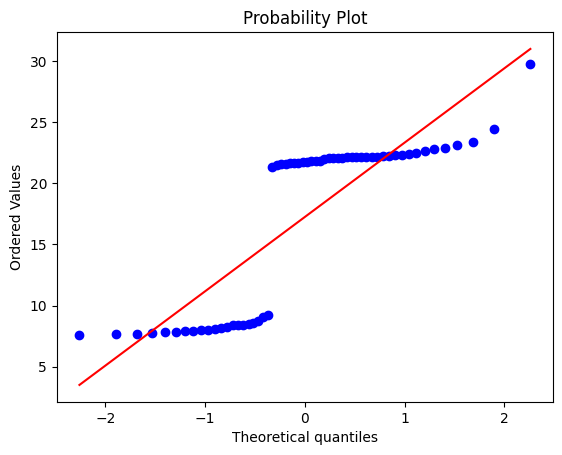

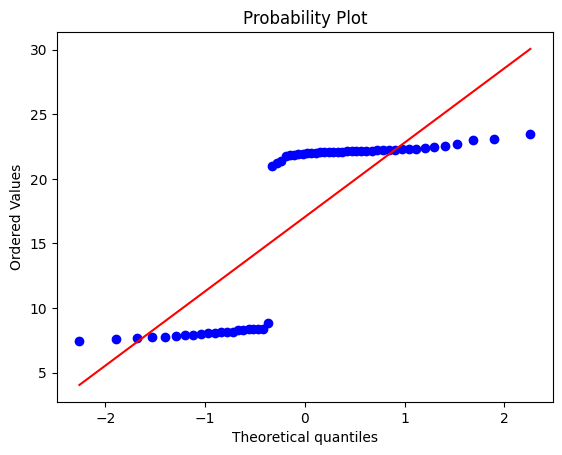

In [29]:
import scipy.stats as stats
stats.probplot(time_s_data, dist="norm", plot=plt)
plt.show()
stats.probplot(time_e_data, dist="norm", plot=plt)
plt.show()

In [45]:
a_s_time = df[(df['subject']=='asterisk')&(df['tool']=='STARTS')]['endtoend_reduction']
i_s_time = df[(df['subject']=='imaging')&(df['tool']=='STARTS')]['endtoend_reduction']
v_s_time = df[(df['subject']=='validator')&(df['tool']=='STARTS')]['endtoend_reduction']
a_e_time = df[(df['subject']=='asterisk')&(df['tool']=='Ekstazi')]['endtoend_reduction']
i_e_time = df[(df['subject']=='imaging')&(df['tool']=='Ekstazi')]['endtoend_reduction']
v_e_time = df[(df['subject']=='validator')&(df['tool']=='Ekstazi')]['endtoend_reduction']
print('t-test')
t_statistic, p_value = ttest_ind(a_s_time, a_e_time)
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')
alpha = 0.05
if p_value < alpha:
    print('statistically significant')
else:
    print('no significal significance')
    
t_statistic, p_value = ttest_ind(i_s_time, i_s_time)
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')
alpha = 0.05
if p_value < alpha:
    print('statistically significant')
else:
    print('no significal significance')
    
t_statistic, p_value = ttest_ind(v_s_time, v_e_time)
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')
alpha = 0.05
if p_value < alpha:
    print('statistically significant')
else:
    print('no significal significance')
    
print('mann-whitney')
t_statistic, p_value = mannwhitneyu(a_s_time, a_e_time, method="exact")
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')
alpha = 0.05
if p_value < alpha:
    print('statistically significant')
else:
    print('no significal significance')
    
t_statistic, p_value = mannwhitneyu(i_s_time, i_s_time, method="exact")
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')
alpha = 0.05
if p_value < alpha:
    print('statistically significant')
else:
    print('no significal significance')
    
t_statistic, p_value = mannwhitneyu(v_s_time, v_e_time, method="exact")
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')
alpha = 0.05
if p_value < alpha:
    print('statistically significant')
else:
    print('no significal significance')

t-test
T-statistic: 0.027757804517846672
P-value: 0.9779867970571674
no significal significance
T-statistic: 0.0
P-value: 1.0
no significal significance
T-statistic: 0.2973497410483911
P-value: 0.7681213294214685
no significal significance
mann-whitney
T-statistic: 241.0
P-value: 0.9907327420600291
no significal significance
T-statistic: 180.5
P-value: 1.0
no significal significance
T-statistic: 161.0
P-value: 0.5861480768593427
no significal significance


## size reduction

In [46]:
s_size = filtered_size_df[filtered_size_df['tool']=='STARTS']['testsuite_reduction']
e_size = filtered_size_df[filtered_size_df['tool']=='Ekstazi']['testsuite_reduction']

t_statistic, p_value = ttest_ind(s_size, e_size)
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')
alpha = 0.05
if p_value < alpha:
    print('statistically significant')
else:
    print('no significal significance')
    
t_statistic, p_value = mannwhitneyu(s_size, e_size, method="exact")
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')
alpha = 0.05
if p_value < alpha:
    print('statistically significant')
else:
    print('no significal significance')

T-statistic: -1.1021870838982237
P-value: 0.27285333349667046
no significal significance
T-statistic: 1441.0
P-value: 0.8205796127540778
no significal significance


In [48]:
a_s_size = filtered_size_df[(filtered_size_df['subject']=='asterisk')&(filtered_size_df['tool']=='STARTS')]['testsuite_reduction']
i_s_size = filtered_size_df[(filtered_size_df['subject']=='imaging')&(filtered_size_df['tool']=='STARTS')]['testsuite_reduction']
v_s_size = filtered_size_df[(filtered_size_df['subject']=='validator')&(filtered_size_df['tool']=='STARTS')]['testsuite_reduction']
a_e_size = filtered_size_df[(filtered_size_df['subject']=='asterisk')&(filtered_size_df['tool']=='Ekstazi')]['testsuite_reduction']
i_e_size = filtered_size_df[(filtered_size_df['subject']=='imaging')&(filtered_size_df['tool']=='Ekstazi')]['testsuite_reduction']
v_e_size = filtered_size_df[(filtered_size_df['subject']=='validator')&(filtered_size_df['tool']=='Ekstazi')]['testsuite_reduction']

t_statistic, p_value = ttest_ind(a_s_size, a_e_size)
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')
alpha = 0.05
if p_value < alpha:
    print('statistically significant')
else:
    print('no significal significance')
    
t_statistic, p_value = ttest_ind(i_s_size, i_s_size)
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')
alpha = 0.05
if p_value < alpha:
    print('statistically significant')
else:
    print('no significal significance')
    
t_statistic, p_value = ttest_ind(v_s_size, v_e_size)
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')
alpha = 0.05
if p_value < alpha:
    print('statistically significant')
else:
    print('no significal significance')

print('mann-whitney')
t_statistic, p_value = mannwhitneyu(a_s_size, a_e_size, method='exact')
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')
alpha = 0.05
if p_value < alpha:
    print('statistically significant')
else:
    print('no significal significance')
    
t_statistic, p_value = mannwhitneyu(i_s_size, i_s_size, method='exact')
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')
alpha = 0.05
if p_value < alpha:
    print('statistically significant')
else:
    print('no significal significance')
    
t_statistic, p_value = mannwhitneyu(v_s_size, v_e_size, method='exact')
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')
alpha = 0.05
if p_value < alpha:
    print('statistically significant')
else:
    print('no significal significance')

T-statistic: 1.4769543698053107
P-value: 0.1486299661902992
no significal significance
T-statistic: 0.0
P-value: 1.0
no significal significance
T-statistic: -0.003763633861494445
P-value: 0.9970204272252814
no significal significance
mann-whitney
T-statistic: 206.0
P-value: 0.21315471189820062
no significal significance
T-statistic: 180.5
P-value: 1.0
no significal significance
T-statistic: 144.5
P-value: 1.0
no significal significance


In [30]:
df.columns


Index(['subject', 'rev', 'tool', 'time_full_suite', 'end-to-end',
       'endtoend_reduction', 'total_tests', 'selected_test_classes',
       'percent_classes_selected', 'changed_classes',
       'percent_mutatants_killed', ' main_files', ' main_loc', ' test_files',
       ' test_loc', 'total_classes', 'percent_of_test_classes',
       ' all_test_cases', 'selected_test_cases', 'testsuite_reduction'],
      dtype='object')

In [32]:
moe_df = df.loc[:,['subject', 'rev', 'tool', 'endtoend_reduction']]
moe_df

,subject,rev,tool,endtoend_reduction
6,asterisk,rev_10,STARTS,7.668
7,asterisk,rev_10,Ekstazi,8.096
12,asterisk,rev_11,STARTS,22.251
13,asterisk,rev_11,Ekstazi,22.311
18,validator,rev_12,STARTS,23.114
...,...,...,...,...
285,asterisk,rev_8,Ekstazi,22.192
288,imaging,rev_9,STARTS,8.443
289,imaging,rev_9,Ekstazi,8.412
290,validator,rev_9,STARTS,21.758


In [35]:
moe_size = filtered_size_df.loc[:,['subject', 'rev', 'tool', 'testsuite_reduction']]
moe_size

,subject,rev,tool,testsuite_reduction
6,asterisk,rev_10,STARTS,0.861111
7,asterisk,rev_10,Ekstazi,0.952381
12,asterisk,rev_11,STARTS,0.908730
13,asterisk,rev_11,Ekstazi,0.912698
18,validator,rev_12,STARTS,0.979167
...,...,...,...,...
285,asterisk,rev_8,Ekstazi,0.825397
288,imaging,rev_9,STARTS,0.182927
289,imaging,rev_9,Ekstazi,0.369338
290,validator,rev_9,STARTS,0.930556


In [36]:
# moe_df.to_csv('time.csv', index=False)

In [37]:
# moe_size.to_csv('size.csv', index=False)

In [50]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols 

In [54]:
model = ols('testsuite_reduction ~ C(tool) + C(subject) + C(tool):C(subject)', 
            data=filtered_size_df).fit() 
result = sm.stats.anova_lm(model, type=2) 
  
# Print the result 
print(result) 

                       df    sum_sq   mean_sq          F        PR(>F)
C(tool)               1.0  0.116156  0.116156   2.535712  1.143611e-01
C(subject)            2.0  4.975425  2.487712  54.307510  7.860910e-17
C(tool):C(subject)    2.0  0.537250  0.268625   5.864160  3.873284e-03
Residual            103.0  4.718213  0.045808        NaN           NaN


In [55]:
model = ols('endtoend_reduction ~ C(tool) + C(subject) + C(tool):C(subject)', 
            data=df).fit() 
result = sm.stats.anova_lm(model, type=2) 
  
# Print the result 
print(result) 

                       df       sum_sq    mean_sq         F    PR(>F)
C(tool)               1.0     1.155804   1.155804  0.023660  0.878035
C(subject)            2.0    67.272213  33.636107  0.688551  0.504455
C(tool):C(subject)    2.0     3.126416   1.563208  0.032000  0.968516
Residual            110.0  5373.564189  48.850584       NaN       NaN
